In [2]:
import pandas as pd
df = pd.read_csv('Boston.csv')
df

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,high,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4
96,high,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9
97,high,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1
98,low,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8


In [3]:
df2 = df.fillna(df.mean())

In [4]:
dummy = pd.get_dummies(df2['CRIME'], drop_first = True)
df3 = df2.join(dummy)
df3 = df3.drop(['CRIME'],axis = 1)
df3

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,1,0
2,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,1
3,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,1,0
4,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4,0,0
96,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9,0,0
97,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1,0,0
98,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8,1,0


In [5]:
from sklearn.preprocessing import StandardScaler

df4 = df3.astype('float')

sc = StandardScaler()
sc_df = sc.fit_transform(df4)

In [6]:
sc_df

array([[-0.46774991,  1.24982611, -0.22941573, ...,  0.42458498,
        -0.57735027, -1.        ],
       [-0.46774991, -0.33769995, -0.22941573, ..., -1.07716254,
         1.73205081, -1.        ],
       [ 3.43213563, -1.31157386, -0.22941573, ...,  0.06752613,
        -0.57735027,  1.        ],
       ...,
       [-0.46774991,  1.24982611, -0.22941573, ..., -1.08766427,
        -0.57735027, -1.        ],
       [-0.46774991, -0.05717325, -0.22941573, ..., -0.59408292,
         1.73205081, -1.        ],
       [-0.46774991,  1.24982611, -0.22941573, ..., -1.93830447,
        -0.57735027, -1.        ]])

In [7]:
from sklearn.decomposition import PCA

In [8]:
model = PCA(n_components = 2, whiten = True)

In [9]:
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [10]:
print(model.components_[0])
print('---------')
print(model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
---------
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [11]:
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175
3,1.030971,0.560933
4,0.898674,0.272037
...,...,...
95,1.456294,-0.118414
96,1.135216,-0.656420
97,1.530951,-0.370069
98,0.282690,0.473770


In [12]:
new_df.columns = ['PC1', 'PC2']

df5 = pd.DataFrame(sc_df, columns = df4.columns)
df6 = pd.concat([df5, new_df], axis = 1)

In [13]:
df6

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low,PC1,PC2
0,-0.467750,1.249826,-0.229416,1.576995,-3.499220,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0,1.490417,-0.680415
1,-0.467750,-0.337700,-0.229416,-0.048340,-0.374040,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0,0.703223,-0.252517
2,3.432136,-1.311574,-0.229416,-1.158986,-0.096712,-0.975080,1.121690,-0.816890,-0.206570,-1.974883,0.356734,-0.646853,0.067526,-0.577350,1.0,-1.403756,-0.613175
3,-0.467750,1.853915,-0.229416,0.728209,-0.111102,1.159555,-1.101934,-0.574758,0.348525,1.388161,0.409624,0.976017,-0.594083,1.732051,-1.0,1.030971,0.560933
4,-0.467750,1.249826,-0.229416,0.637912,0.973358,0.072506,-0.684301,1.846563,1.776804,0.870770,0.034157,-0.024483,0.666125,-0.577350,-1.0,0.898674,0.272037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.467750,1.249826,-0.229416,1.775647,-0.022147,1.234896,-0.939511,1.846563,1.776804,0.870770,0.389178,0.700880,-0.531073,-0.577350,-1.0,1.456294,-0.118414
96,-0.467750,1.249826,-0.229416,1.008127,-0.623898,-0.623493,-0.426433,1.846563,1.776804,0.870770,-0.646482,0.338934,-0.373547,-0.577350,-1.0,1.135216,-0.656420
97,-0.467750,1.249826,-0.229416,1.152602,0.188466,1.098566,-1.238504,1.846563,1.776804,0.870770,0.409624,1.745519,-1.087664,-0.577350,-1.0,1.530951,-0.370069
98,-0.467750,-0.057173,-0.229416,0.005837,-0.421134,0.632175,0.024013,-0.574758,-0.480999,-0.060535,0.304858,0.956890,-0.594083,1.732051,-1.0,0.282690,0.473770


In [14]:
df_corr = df6.corr()
df_corr.loc[:'very_low', 'PC1':]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


In [15]:
pc_corr = df_corr.loc[:'very_low', 'PC1':]
pc_corr['PC1'].sort_values(ascending = False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [16]:
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<AxesSubplot:xlabel='Exclusive residential', ylabel='City'>

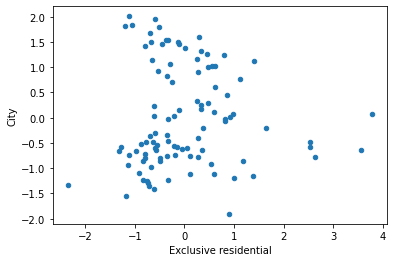

In [17]:
col = ['City', 'Exclusive residential']

new_df.columns = col

new_df.plot(kind = 'scatter', x = 'Exclusive residential', y = 'City')

In [18]:
model = PCA(whiten = True)

tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [19]:
model.explained_variance_ratio_

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

<AxesSubplot:>

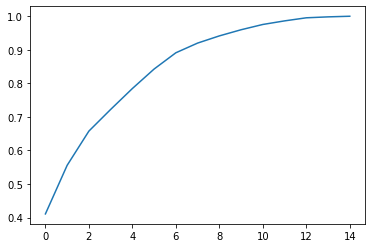

In [20]:
ratio = model.explained_variance_ratio_

array = []

for i in range(len(ratio)):
    ruiseki = sum(ratio[0:(i + 1)])
    array.append(ruiseki)
    
pd.Series(array).plot(kind = 'line')  

In [21]:
thred = 0.8
for i in range(len(array)):
    if array[i] >= thred:
        print(i + 1)
        break
    

6


In [22]:
model = PCA(n_components = 6, whiten = True)

model.fit(sc_df)

new = model.transform(sc_df)

In [23]:
col = []
for i in range(1,7):
    x = 'PC' + str(i)
    col.append(x)
col    

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [24]:
new_df2 = pd.DataFrame(new, columns = col)

new_df2.to_csv('boston_pca.csv', index = False)

In [25]:
ratio

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

In [26]:
array

[0.4110278884821045,
 0.555874871179961,
 0.6578018492283123,
 0.722291391490566,
 0.7846282342772555,
 0.8427315470136677,
 0.8911686592456961,
 0.9200209345719073,
 0.9414452465003726,
 0.9597648638334387,
 0.9754943067525306,
 0.9861804175217096,
 0.9953650725978404,
 0.9981405523566366,
 0.9999999999999999]

In [27]:
df = pd.read_csv('cinema.csv')
df

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286
...,...,...,...,...,...,...
95,1260,494.0,1050,11137.482810,1,10537
96,1283,505.0,928,11376.038540,1,10084
97,1861,368.0,966,10393.252480,0,10069
98,1006,326.0,1068,9454.019853,1,10218


In [28]:
df.isna().any()

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [29]:
df = df.drop('cinema_id', axis = 1)
df = df.fillna(df.mean())

In [30]:
df

,SNS1,SNS2,actor,original,sales
0,291.0,1044,8808.994029,0,9731
1,363.0,568,10290.709370,1,10210
2,158.0,431,6340.388534,1,8227
3,261.0,578,8250.485081,0,9658
4,209.0,683,10908.539550,0,9286
...,...,...,...,...,...
95,494.0,1050,11137.482810,1,10537
96,505.0,928,11376.038540,1,10084
97,368.0,966,10393.252480,0,10069
98,326.0,1068,9454.019853,1,10218


In [33]:
from sklearn.preprocessing import StandardScaler

df2 = df.astype('float')
sc = StandardScaler()
sc_df = sc.fit_transform(df2)

In [39]:
from sklearn.decomposition import PCA

model = PCA(whiten = True)

tmp = model.fit_transform(sc_df)
tmp.shape

(100, 5)

model.explained_variance_ratio_

<AxesSubplot:>

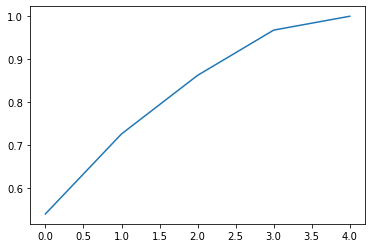

In [40]:
ratio = model.explained_variance_ratio_

array = []

for i in range(len(ratio)):
    ruiseki = sum(ratio[0:(i+1)])
    
    array.append(ruiseki)
    
pd.Series(array).plot(kind = 'line')    

In [41]:
thred = 0.85

for i in range(len(array)):
    if array[i] >= thred:
        print(i + 1)
        break

3


In [42]:
model = PCA(n_components = 3, whiten = True)

model.fit(sc_df)

new = model.transform(sc_df)

In [43]:
new_df = pd.DataFrame(new)
new_df

,0,1,2
0,-0.295258,-1.493840,0.796023
1,0.345074,1.011520,0.230844
2,-1.726106,1.381032,0.988676
3,-0.805069,-0.645784,-0.206652
4,-0.388943,-0.898778,0.243571
...,...,...,...
95,1.168840,0.105565,0.860083
96,0.954356,0.304229,0.578665
97,0.239159,-1.413244,0.248807
98,0.462542,0.157977,1.597191


In [44]:
new_df.columns = ['PC1', 'PC2', 'PC3']
df3 = pd.DataFrame(sc_df, columns = df2.columns)
df4 = pd.concat([df3, new_df], axis = 1)
df4

,SNS1,SNS2,actor,original,sales,PC1,PC2,PC3
0,-0.380071,1.196371,-0.704163,-1.0,-0.190425,-0.295258,-1.493840,0.796023
1,-0.036880,-0.280899,0.330366,1.0,0.411923,0.345074,1.011520,0.230844
2,-1.014021,-0.706079,-2.427735,1.0,-2.081724,-1.726106,1.381032,0.988676
3,-0.523067,-0.249863,-1.094112,-1.0,-0.282224,-0.805069,-0.645784,-0.206652
4,-0.770927,0.076005,0.761733,-1.0,-0.750018,-0.388943,-0.898778,0.243571
...,...,...,...,...,...,...,...,...
95,0.587536,1.214993,0.921580,1.0,0.823130,1.168840,0.105565,0.860083
96,0.639968,0.836365,1.088139,1.0,0.253477,0.954356,0.304229,0.578665
97,-0.013048,0.954298,0.401961,-1.0,0.234614,0.239159,-1.413244,0.248807
98,-0.213242,1.270856,-0.253808,1.0,0.421984,0.462542,0.157977,1.597191


In [45]:
df_corr = df4.corr()
df_corr.loc[:'sales', 'PC1':]

,PC1,PC2,PC3
SNS1,0.736368,-0.050756,-0.531509
SNS2,0.598555,-0.534089,0.536704
actor,0.837999,-0.037073,-0.017275
original,0.469117,0.800559,0.324773
sales,0.936901,0.013415,-0.072303


In [52]:
pc_corr = df_corr.loc[:'sales', 'PC1':]
for i in range(len(pc_corr.columns)):
    pc_corr[pc_corr.columns[i]].sort_values(ascending = False)

In [54]:
col = ['famous', 'original', 'target']

new_df.columns = col
new_df

,famous,original,target
0,-0.295258,-1.493840,0.796023
1,0.345074,1.011520,0.230844
2,-1.726106,1.381032,0.988676
3,-0.805069,-0.645784,-0.206652
4,-0.388943,-0.898778,0.243571
...,...,...,...
95,1.168840,0.105565,0.860083
96,0.954356,0.304229,0.578665
97,0.239159,-1.413244,0.248807
98,0.462542,0.157977,1.597191
